# LSTM WITH YAHOO FINANCE APPLE (AAPL)

Here, we will be using AAPL stock with database fetching from Yahoo Finance API which will be later implemented into our final stock forecasting app "Predict It". We will try to see how we can fetch data from Yahoo Finance API and feed it directly to the LSTM model for prediction. We will be using the implementation method later for web app development as well. This is like a trail for the app.

Since previously, we tested our models with NABIL with pre-processed data from NepseAlpha, it is necessary we do this through Yahoo Finance to see if we can feed the data directly as we did from NepseAlpha. We also need to try it for a different stock APPL which is available in Yahoo Finance since NESPE which is stock exchange of Nepal where NABIL is listed is not availabe in Yahoo Finance.

We will also be trying to make LSTM more compact so it would be easy for implementation for Django web app.

In [1]:
from formulas import *
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

keras = tf.keras

In [2]:
apple = yf.Ticker("AAPL")

In [3]:
apple.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscriptio

In [4]:
apple.history(period='5d')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-07-24 00:00:00-04:00,193.410004,194.910004,192.250000,192.750000,45377800,0.0,0.0
2023-07-25 00:00:00-04:00,193.330002,194.440002,192.919998,193.619995,37283200,0.0,0.0
2023-07-26 00:00:00-04:00,193.669998,195.639999,193.320007,194.500000,47471900,0.0,0.0
2023-07-27 00:00:00-04:00,196.020004,197.199997,192.550003,193.220001,47460200,0.0,0.0
2023-07-28 00:00:00-04:00,194.669998,196.630005,194.139999,195.830002,48254600,0.0,0.0


In [5]:
df=apple.history(start='2001-01-01', end='2022-12-29', actions=False)

In [6]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2001-01-02 00:00:00-05:00,0.225766,0.231457,0.221023,0.225766,452312000
2001-01-03 00:00:00-05:00,0.220075,0.253275,0.219126,0.248533,817073600
2001-01-04 00:00:00-05:00,0.275330,0.280784,0.255172,0.258967,739396000
2001-01-05 00:00:00-05:00,0.257069,0.263710,0.243789,0.248533,412356000
2001-01-08 00:00:00-05:00,0.257069,0.257781,0.241892,0.251378,373699200
...,...,...,...,...,...
2022-12-21 00:00:00-05:00,132.593872,136.412753,132.364544,135.056702,85928000
2022-12-22 00:00:00-05:00,133.959893,134.169275,129.921650,131.846039,77852100
2022-12-23 00:00:00-05:00,130.539854,132.035499,129.263572,131.477127,63814900


In [7]:
df.index

DatetimeIndex(['2001-01-02 00:00:00-05:00', '2001-01-03 00:00:00-05:00',
               '2001-01-04 00:00:00-05:00', '2001-01-05 00:00:00-05:00',
               '2001-01-08 00:00:00-05:00', '2001-01-09 00:00:00-05:00',
               '2001-01-10 00:00:00-05:00', '2001-01-11 00:00:00-05:00',
               '2001-01-12 00:00:00-05:00', '2001-01-16 00:00:00-05:00',
               ...
               '2022-12-14 00:00:00-05:00', '2022-12-15 00:00:00-05:00',
               '2022-12-16 00:00:00-05:00', '2022-12-19 00:00:00-05:00',
               '2022-12-20 00:00:00-05:00', '2022-12-21 00:00:00-05:00',
               '2022-12-22 00:00:00-05:00', '2022-12-23 00:00:00-05:00',
               '2022-12-27 00:00:00-05:00', '2022-12-28 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=5533, freq=None)

In [8]:
df.shape

(5533, 5)

In [9]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
df=df.drop(['Open','High','Volume','Low'],axis=1)

In [11]:
df.head()

,Close
Date,
2001-01-02 00:00:00-05:00,0.225766
2001-01-03 00:00:00-05:00,0.248533
2001-01-04 00:00:00-05:00,0.258967
2001-01-05 00:00:00-05:00,0.248533
2001-01-08 00:00:00-05:00,0.251378


In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

Text(0.5, 0, 'Time')

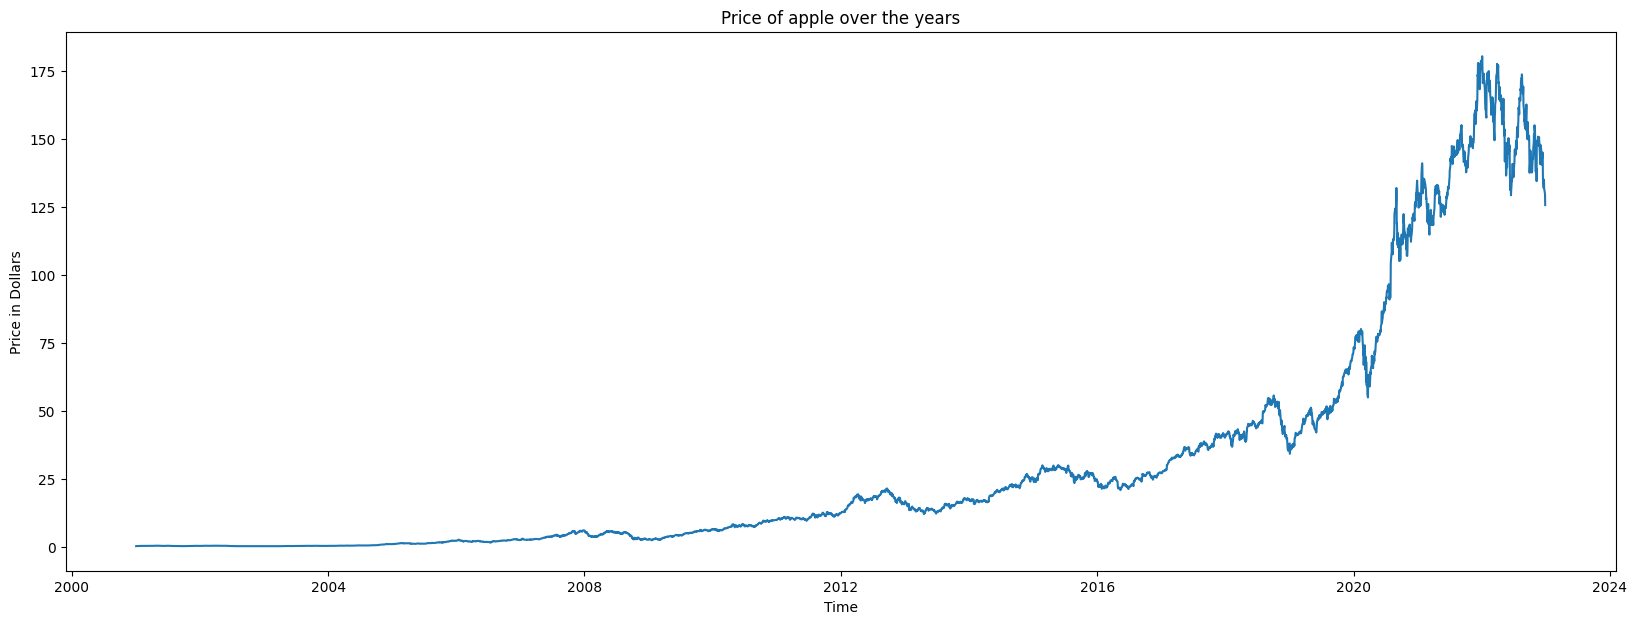

In [13]:
plt.figure(figsize=(20,7))
plt.title("Price of apple over the years")
plt.plot(df['2001-01-01':'2022-12-29'])
plt.ylabel("Price in Dollars")
plt.xlabel("Time")

Text(0.5, 0, 'Time')

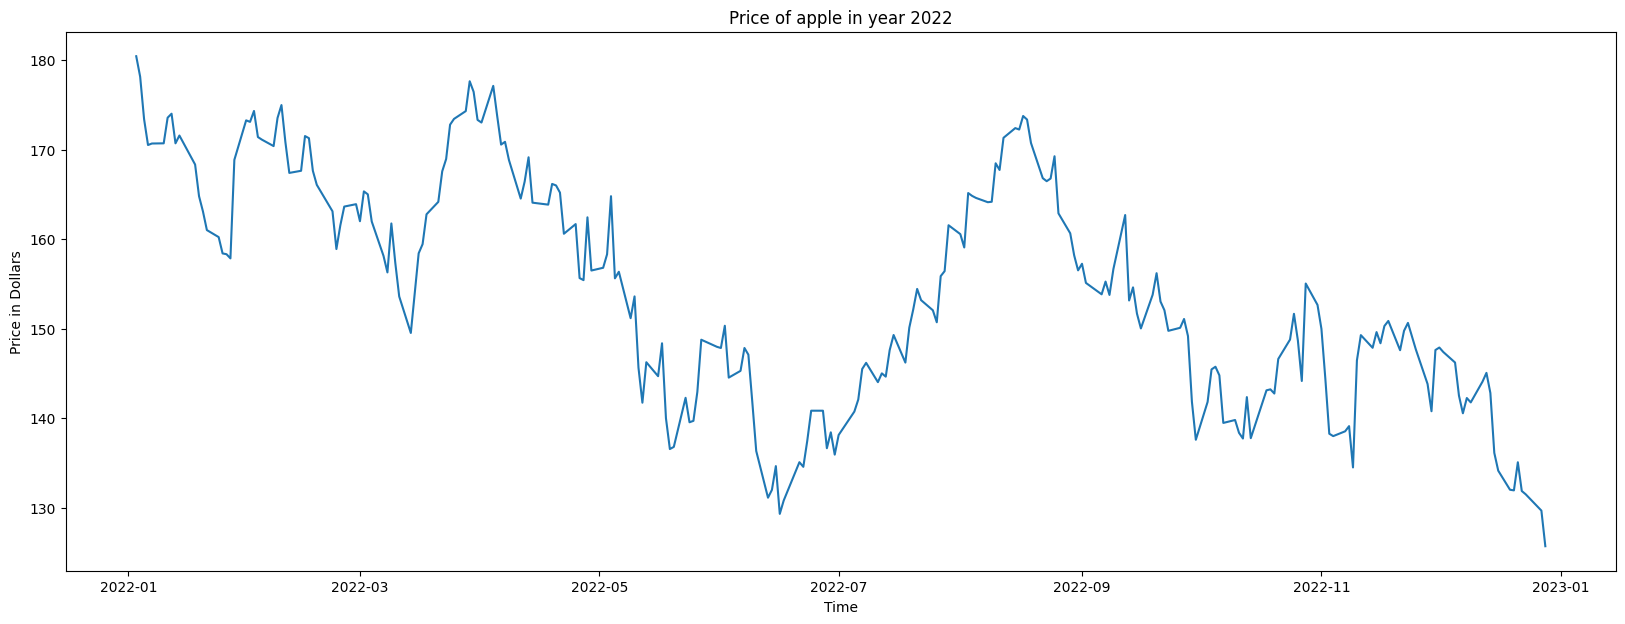

In [14]:
plt.figure(figsize=(20,7))
plt.title("Price of apple in year 2022")
plt.plot(df['2022-01-01':'2022-12-29'])
plt.ylabel("Price in Dollars")
plt.xlabel("Time")

In [15]:
data=df.values

In [16]:
data

array([[  0.22576603],
       [  0.24853256],
       [  0.25896731],
       ...,
       [131.47712708],
       [129.6524353 ],
       [125.67401886]])

In [17]:
len(data)

5533

In [18]:
import math

In [19]:
train_len=math.ceil(len(data)*0.92)

In [20]:
train_len

5091

In [21]:
min_max_scalar=MinMaxScaler(feature_range=(0,1))

In [22]:
scaled_data=min_max_scalar.fit_transform(data)

In [23]:
len(scaled_data)

5533

In [24]:
scaled_data

array([[1.47786722e-04],
       [2.74102429e-04],
       [3.31997610e-04],
       ...,
       [7.28370670e-01],
       [7.18246719e-01],
       [6.96173242e-01]])

In [25]:
train_data=scaled_data[0:train_len,:]

In [26]:
len(train_data)

5091

In [27]:
interval=60

In [28]:
x_train=[]
y_train=[]

for i in range(interval,len(train_data)):
    x_train.append(train_data[i-interval:i,0])
    y_train.append(train_data[i,0])

In [29]:
x_train

[array([0.00014779, 0.0002741 , 0.000332  , 0.0002741 , 0.00028989,
        0.00034252, 0.00028989, 0.00041094, 0.00034252, 0.00033726,
        0.00031094, 0.00046884, 0.00053725, 0.0005162 , 0.00062146,
        0.00062146, 0.0005741 , 0.00054252, 0.00072147, 0.00072673,
        0.0007162 , 0.0006741 , 0.000632  , 0.00059515, 0.0006741 ,
        0.00064252, 0.00064252, 0.00050568, 0.00055305, 0.00050568,
        0.00053725, 0.00058462, 0.00049515, 0.00043726, 0.00048463,
        0.00047936, 0.00047936, 0.00053725, 0.00052673, 0.000432  ,
        0.0004741 , 0.0005162 , 0.00061094, 0.00070568, 0.00068462,
        0.00064778, 0.00060041, 0.00046357, 0.00054252, 0.0006162 ,
        0.00055305, 0.00054778, 0.00062673, 0.00055305, 0.00058989,
        0.0007162 , 0.00083199, 0.00072926, 0.00082104, 0.0007621 ]),
 array([0.0002741 , 0.000332  , 0.0002741 , 0.00028989, 0.00034252,
        0.00028989, 0.00041094, 0.00034252, 0.00033726, 0.00031094,
        0.00046884, 0.00053725, 0.0005162 , 0.

In [30]:
y_train

[0.0007924102423318273,
 0.000753674944515893,
 0.000713256028130931,
 0.0005995732476024749,
 0.0005372548883869699,
 0.0006526260827052846,
 0.0006290474858216602,
 0.000624835793760012,
 0.0007511468710232722,
 0.0007309401411460916,
 0.0007831480252679811,
 0.000700622440117968,
 0.0006130464953181996,
 0.0008143047245890967,
 0.0010610423163937008,
 0.0010037791120487826,
 0.0009372543520497878,
 0.0009187259494634764,
 0.0009768327819697756,
 0.0009743058659442518,
 0.0011014610674262204,
 0.0010416749155143974,
 0.0010787264294088615,
 0.0011343013853163636,
 0.000997040338609168,
 0.0010635654293130478,
 0.000997040338609168,
 0.0009641995246616973,
 0.0009145145881067128,
 0.0008319890029567,
 0.0008193603755170106,
 0.0008564117240590326,
 0.0008471503337573985,
 0.0009246202679794974,
 0.0008783071984309568,
 0.0008766237452143713,
 0.0008791460313715062,
 0.0008740963331315208,
 0.0008513577266555429,
 0.0008488334562690989,
 0.0008117819423746344,
 0.0007031500175532614,
 

In [31]:
import numpy as np

In [32]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [33]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [34]:
x_train.shape

(5031, 60, 1)

In [35]:
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,LSTM
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [36]:
model=Sequential()
# model.add(LSTM(100,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(LSTM(150,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(LSTM(75,return_sequences=True))
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

model.add(LSTM(units=50))
# model.add(Dropout(0.2))
# model.add(LSTM(50,return_sequences=False))
model.add(Dense(50))
# model.add(drop)
# model.add(Dense(25))
model.add(Dense(1))

In [37]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [38]:
history=model.fit(x_train,y_train,batch_size=64,epochs=100)

Epoch 1/100
79/79 [==============================] - 4s 27ms/step - loss: 0.0019
Epoch 2/100
79/79 [==============================] - 2s 28ms/step - loss: 8.2315e-05
Epoch 3/100
79/79 [==============================] - 2s 28ms/step - loss: 7.6788e-05
Epoch 4/100
79/79 [==============================] - 2s 28ms/step - loss: 7.7163e-05
Epoch 5/100
79/79 [==============================] - 2s 28ms/step - loss: 7.8553e-05
Epoch 6/100
79/79 [==============================] - 2s 29ms/step - loss: 7.3836e-05
Epoch 7/100
79/79 [==============================] - 2s 28ms/step - loss: 7.2032e-05
Epoch 8/100
79/79 [==============================] - 2s 29ms/step - loss: 6.3443e-05
Epoch 9/100
79/79 [==============================] - 2s 29ms/step - loss: 6.0974e-05
Epoch 10/100
79/79 [==============================] - 2s 29ms/step - loss: 6.3728e-05
Epoch 11/100
79/79 [==============================] - 2s 29ms/step - loss: 7.5889e-05
Epoch 12/100
79/79 [==============================] - 2s 31ms/step 

In [39]:
test_data=scaled_data[train_len-interval:,:]

In [40]:
x_test=[]
y_test=data[train_len:,:]
for i in range(interval,len(test_data)):
    x_test.append(test_data[i-interval:i,0])

In [41]:
y_test

array([[118.31026459],
       [120.53042603],
       [121.36915588],
       [124.23070526],
       [124.53659821],
       [126.20418549],
       [128.63157654],
       [131.23657227],
       [129.49989319],
       [132.64759827],
       [130.2794342 ],
       [132.71665955],
       [132.38117981],
       [133.0521698 ],
       [131.34512329],
       [131.72993469],
       [130.19062805],
       [132.53907776],
       [132.93374634],
       [132.60812378],
       [131.80886841],
       [131.71018982],
       [129.71697998],
       [130.78266907],
       [126.15485382],
       [126.40153503],
       [128.01979065],
       [128.70181274],
       [125.38071442],
       [124.45159912],
       [121.34796906],
       [123.52249146],
       [125.97376251],
       [124.80742645],
       [123.40387726],
       [123.2457428 ],
       [125.83538818],
       [123.97716522],
       [125.62782288],
       [125.43013763],
       [125.38071442],
       [123.8289032 ],
       [123.16665649],
       [122

In [42]:
x_test

[array([0.7242549 , 0.70632458, 0.71507102, 0.69096345, 0.71457914,
        0.72075639, 0.70397394, 0.70298993, 0.71441499, 0.70359111,
        0.69391543, 0.69768739, 0.72064693, 0.7471051 , 0.75913171,
        0.78017787, 0.78149011, 0.77547651, 0.74830778, 0.72026435,
        0.73218141, 0.73682816, 0.73108802, 0.74994782, 0.74762093,
        0.74844214, 0.74351498, 0.74012052, 0.73869721, 0.74001106,
        0.72807622, 0.71521054, 0.70902402, 0.70990013, 0.68871279,
        0.68794632, 0.68515413, 0.66128429, 0.66276246, 0.69851254,
        0.68389502, 0.66714224, 0.65657603, 0.66363844, 0.63593623,
        0.66183179, 0.65575486, 0.66659479, 0.66150326, 0.67770854,
        0.6863586 , 0.68192408, 0.65876594, 0.65580951, 0.67442372,
        0.66977014, 0.65635701, 0.65909442, 0.66248875, 0.66347416]),
 array([0.70632458, 0.71507102, 0.69096345, 0.71457914, 0.72075639,
        0.70397394, 0.70298993, 0.71441499, 0.70359111, 0.69391543,
        0.69768739, 0.72064693, 0.7471051 , 0.

In [43]:
len(y_test)

442

In [44]:
len(x_test)

442

In [45]:
x_test=np.array(x_test)

In [46]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [47]:
predictions=model.predict(x_test)
predictions=min_max_scalar.inverse_transform(predictions)

14/14 [==============================] - 1s 5ms/step


In [48]:
predictions[0:5]

array([[121.21277],
       [119.74343],
       [121.83413],
       [122.75543],
       [125.52939]], dtype=float32)

In [49]:
rmse_error=np.sqrt(np.mean(predictions-y_test)**2)
rmse_error

0.528961009029889

In [50]:
train_data=df[0:train_len]
valid_data=df[train_len:]
valid_data['predictions']=predictions

/var/folders/7c/1rzbrtxj2s3bn1b6l1dklf8w0000gn/T/ipykernel_12467/36431782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['predictions']=predictions


In [51]:
train_data.head()

,Close
Date,
2001-01-02 00:00:00-05:00,0.225766
2001-01-03 00:00:00-05:00,0.248533
2001-01-04 00:00:00-05:00,0.258967
2001-01-05 00:00:00-05:00,0.248533
2001-01-08 00:00:00-05:00,0.251378


In [52]:
valid_data.head()

,Close,predictions
Date,,
2021-03-30 00:00:00-04:00,118.310265,121.212769
2021-03-31 00:00:00-04:00,120.530426,119.743431
2021-04-01 00:00:00-04:00,121.369156,121.834129
2021-04-05 00:00:00-04:00,124.230705,122.755432
2021-04-06 00:00:00-04:00,124.536598,125.529388


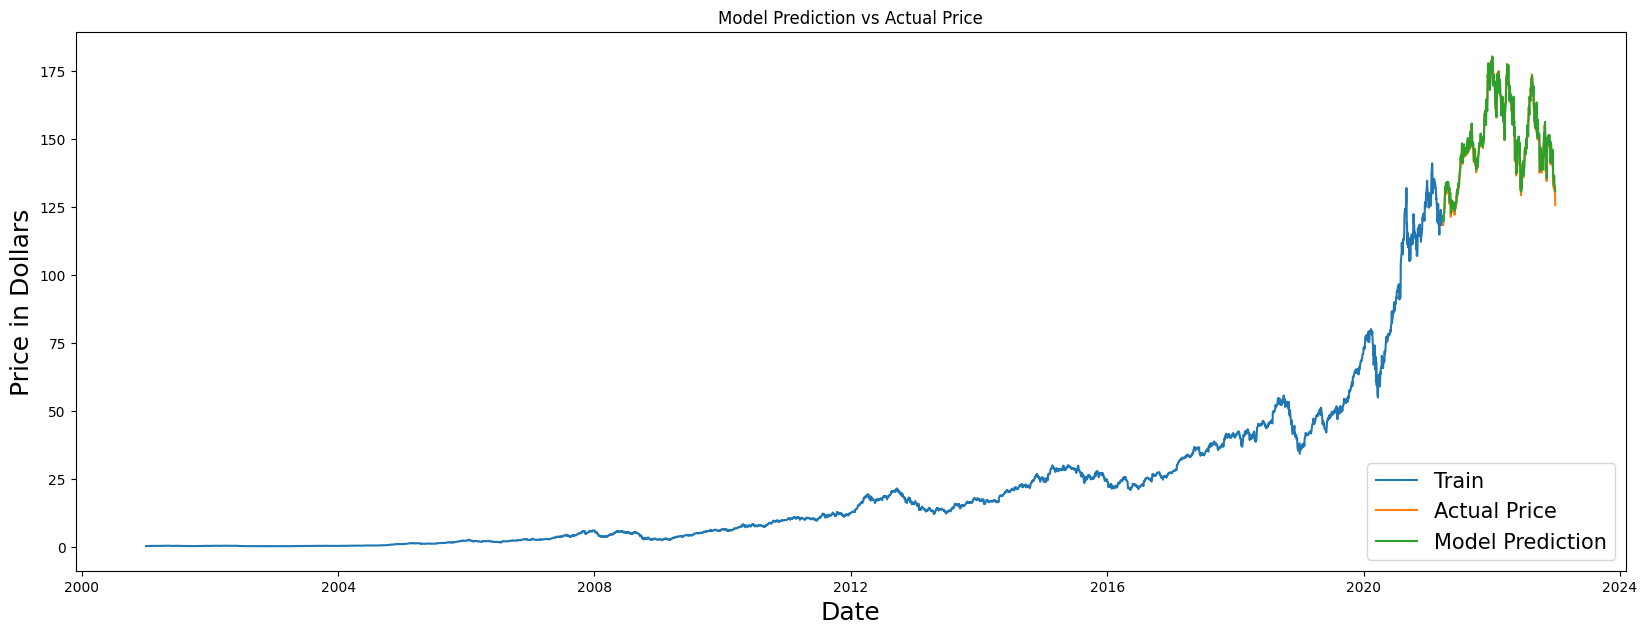

In [53]:
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in Dollars",fontsize=18)
plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Train','Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

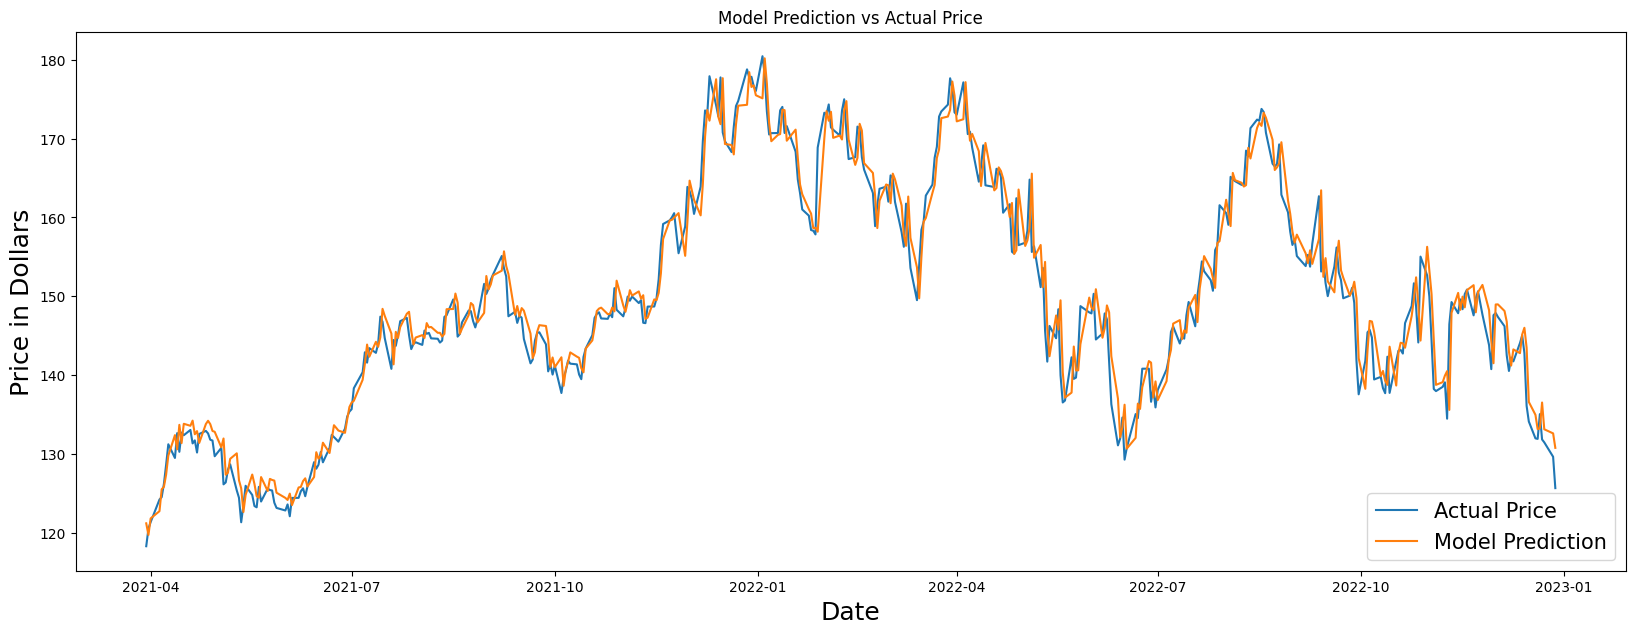

In [54]:
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in Dollars",fontsize=18)
# plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

In [55]:
valid_data.head(30)

,Close,predictions
Date,,
2021-03-30 00:00:00-04:00,118.310265,121.212769
2021-03-31 00:00:00-04:00,120.530426,119.743431
2021-04-01 00:00:00-04:00,121.369156,121.834129
2021-04-05 00:00:00-04:00,124.230705,122.755432
2021-04-06 00:00:00-04:00,124.536598,125.529388
2021-04-07 00:00:00-04:00,126.204185,125.839912
2021-04-08 00:00:00-04:00,128.631577,127.385132
2021-04-09 00:00:00-04:00,131.236572,129.798050
2021-04-12 00:00:00-04:00,129.499893,132.396515


In [56]:
df_test=apple.history(start='2001-01-01', end='2022-12-29', actions=False)

In [57]:
df_test.head(1)

,Open,High,Low,Close,Volume
Date,,,,,
2001-01-02 00:00:00-05:00,0.225766,0.231457,0.221023,0.225766,452312000


In [58]:
df_test=df_test.drop(['Open','High','Volume','Low'],axis=1)

In [59]:
test_value=df_test[-60:].values

In [60]:
test_value

array([[145.43452454],
       [145.73313904],
       [144.76756287],
       [139.45188904],
       [139.78039551],
       [138.34695435],
       [137.70986938],
       [142.33869934],
       [137.74969482],
       [141.76132202],
       [143.09521484],
       [143.20471191],
       [142.73686218],
       [146.59919739],
       [148.76925659],
       [151.64610291],
       [148.66970825],
       [144.14044189],
       [155.03060913],
       [152.64154053],
       [149.96379089],
       [144.36938477],
       [138.24740601],
       [137.97819519],
       [138.51661682],
       [139.09494019],
       [134.4783783 ],
       [146.44352722],
       [149.26531982],
       [147.84944153],
       [149.60432434],
       [148.35795593],
       [150.28234863],
       [150.85069275],
       [147.58023071],
       [149.74391174],
       [150.63134766],
       [147.6799469 ],
       [143.80123901],
       [140.76008606],
       [147.60017395],
       [147.87934875],
       [147.3808136 ],
       [146

In [61]:
test_value=min_max_scalar.transform(test_value)

In [62]:
test=[]
test.append(test_value)

In [63]:
test

[array([[0.8058106 ],
        [0.8074674 ],
        [0.80211009],
        [0.7726171 ],
        [0.77443975],
        [0.76648658],
        [0.76295184],
        [0.78863401],
        [0.7631728 ],
        [0.78543054],
        [0.79283139],
        [0.79343891],
        [0.79084314],
        [0.81227256],
        [0.82431272],
        [0.84027435],
        [0.82376039],
        [0.79863063],
        [0.85905263],
        [0.84579734],
        [0.83094036],
        [0.79990088],
        [0.76593426],
        [0.76444059],
        [0.76742792],
        [0.77063664],
        [0.74502253],
        [0.81140886],
        [0.82706503],
        [0.8192093 ],
        [0.82894593],
        [0.8220307 ],
        [0.83270782],
        [0.83586117],
        [0.81771564],
        [0.8297204 ],
        [0.83464417],
        [0.81826889],
        [0.79674863],
        [0.77987538],
        [0.81782629],
        [0.81937524],
        [0.81660921],
        [0.81008121],
        [0.78950144],
        [0

In [64]:
test=np.array(test)

In [65]:
test

array([[[0.8058106 ],
        [0.8074674 ],
        [0.80211009],
        [0.7726171 ],
        [0.77443975],
        [0.76648658],
        [0.76295184],
        [0.78863401],
        [0.7631728 ],
        [0.78543054],
        [0.79283139],
        [0.79343891],
        [0.79084314],
        [0.81227256],
        [0.82431272],
        [0.84027435],
        [0.82376039],
        [0.79863063],
        [0.85905263],
        [0.84579734],
        [0.83094036],
        [0.79990088],
        [0.76593426],
        [0.76444059],
        [0.76742792],
        [0.77063664],
        [0.74502253],
        [0.81140886],
        [0.82706503],
        [0.8192093 ],
        [0.82894593],
        [0.8220307 ],
        [0.83270782],
        [0.83586117],
        [0.81771564],
        [0.8297204 ],
        [0.83464417],
        [0.81826889],
        [0.79674863],
        [0.77987538],
        [0.81782629],
        [0.81937524],
        [0.81660921],
        [0.81008121],
        [0.78950144],
        [0

In [66]:
test=np.reshape(test,(test.shape[0],test.shape[1],1))

In [67]:
tomorrow_prediction=model.predict(test)

1/1 [==============================] - 0s 14ms/step


In [68]:
tomorrow_prediction=min_max_scalar.inverse_transform(tomorrow_prediction)

In [69]:
tomorrow_prediction

array([[126.81104]], dtype=float32)

In [70]:
model.save("../Models/apple_price_prediction.h5")

/Users/bijay/.pyenv/versions/3.11.4/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
